In [71]:
import pandas as pd 

In [72]:
%pwd

'e:\\GAN for Face expression Classification\\final deployment'

In [73]:
import pandas as pd

# Load the first CSV file
face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the second CSV file
voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\karti\AppData\Local\Temp\ipykernel_26468\3532732736.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\karti\AppData\Local\Temp\ipykernel_26468\3532732736.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [74]:
print(face_emotions)

                    time face_emotion
0    2024-04-24 21:16:21        happy
1    2024-04-24 21:16:22      neutral
2    2024-04-24 21:16:23      neutral
3    2024-04-24 21:16:23          sad
4    2024-04-24 21:16:25          sad
..                   ...          ...
366  2024-04-24 21:26:10          sad
367  2024-04-24 21:26:11        happy
368  2024-04-24 21:26:12          sad
369  2024-04-24 21:26:18         fear
370  2024-04-24 21:26:20        happy

[371 rows x 2 columns]


In [75]:
print(voice_emotions)

                   time voice emotion
0   2024-04-24 21:16:38           sad
1   2024-04-24 21:16:46           sad
2   2024-04-24 21:16:55           sad
3   2024-04-24 21:17:04           sad
4   2024-04-24 21:17:12           sad
..                  ...           ...
73  2024-04-24 21:27:09           sad
74  2024-04-24 21:27:18           sad
75  2024-04-24 21:27:26           sad
76  2024-04-24 21:27:35           sad
77  2024-04-24 21:27:44           sad

[78 rows x 2 columns]


In [76]:
# Merge the DataFrames based on time
merged_df = pd.merge(face_emotions, voice_emotions, on='time', how='outer')

# Set 'time' column as index
merged_df.set_index('time', inplace=True)


# Display head of merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                    face_emotion voice emotion
time                                          
2024-04-24 21:16:21        happy           NaN
2024-04-24 21:16:22      neutral           NaN
2024-04-24 21:16:23      neutral           NaN
2024-04-24 21:16:23          sad           NaN
2024-04-24 21:16:25          sad           NaN
...                          ...           ...
2024-04-24 21:27:09          NaN           sad
2024-04-24 21:27:18          NaN           sad
2024-04-24 21:27:26          NaN           sad
2024-04-24 21:27:35          NaN           sad
2024-04-24 21:27:44          NaN           sad

[418 rows x 2 columns]


In [77]:
# Fill NaN values with a placeholder, limit to one consecutive NaN value
merged_df_filled = merged_df.fillna(method='ffill', limit=1)

# Reset index
merged_df_filled.reset_index(inplace=True)

# Display head of merged DataFrame after filling NaNs
print("\nMerged DataFrame with limited consecutive NaNs:")
print(merged_df_filled)


Merged DataFrame with limited consecutive NaNs:
                    time face_emotion voice emotion
0    2024-04-24 21:16:21        happy           NaN
1    2024-04-24 21:16:22      neutral           NaN
2    2024-04-24 21:16:23      neutral           NaN
3    2024-04-24 21:16:23          sad           NaN
4    2024-04-24 21:16:25          sad           NaN
..                   ...          ...           ...
413  2024-04-24 21:27:09          NaN           sad
414  2024-04-24 21:27:18          NaN           sad
415  2024-04-24 21:27:26          NaN           sad
416  2024-04-24 21:27:35          NaN           sad
417  2024-04-24 21:27:44          NaN           sad

[418 rows x 3 columns]


C:\Users\karti\AppData\Local\Temp\ipykernel_26468\2794070047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill', limit=1)


In [78]:
merged_df_filled.columns

Index(['time', 'face_emotion', 'voice emotion'], dtype='object')

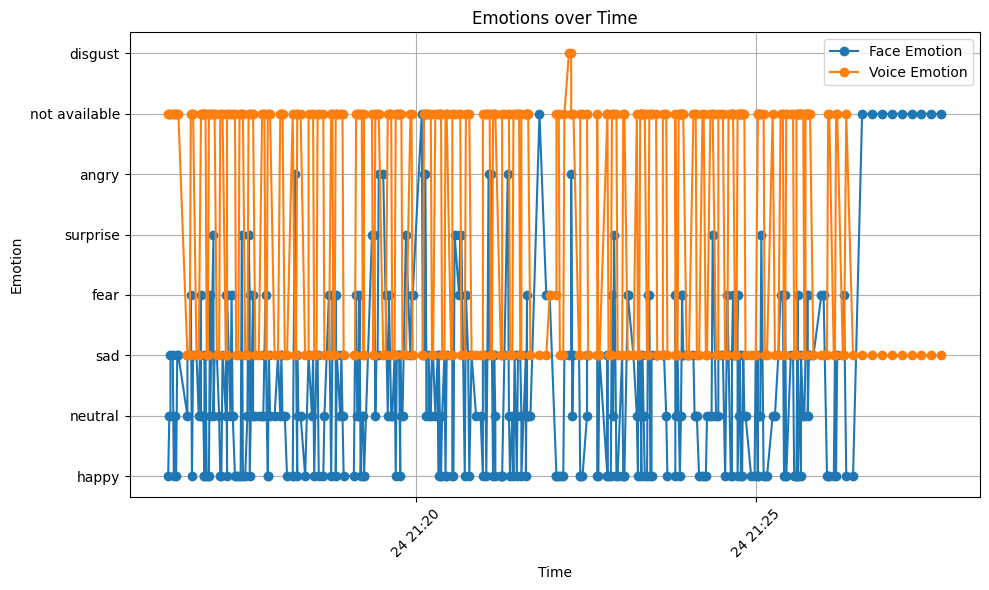

In [79]:
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_df_filled['time'] = pd.to_datetime(merged_df_filled['time'])

# Set 'time' column as index
merged_df_filled.set_index('time', inplace=True)

# Fill NaN values with a placeholder
merged_df_filled = merged_df_filled.fillna('not available')

# Plot emotions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['face_emotion'], label='Face Emotion', marker='o')
plt.plot(merged_df_filled.index, merged_df_filled['voice emotion'], label='Voice Emotion', marker='o')
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotions over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
print(merged_df_filled)


                      face_emotion  voice emotion
time                                             
2024-04-24 21:16:21          happy  not available
2024-04-24 21:16:22        neutral  not available
2024-04-24 21:16:23        neutral  not available
2024-04-24 21:16:23            sad  not available
2024-04-24 21:16:25            sad  not available
...                            ...            ...
2024-04-24 21:27:09  not available            sad
2024-04-24 21:27:18  not available            sad
2024-04-24 21:27:26  not available            sad
2024-04-24 21:27:35  not available            sad
2024-04-24 21:27:44  not available            sad

[418 rows x 2 columns]


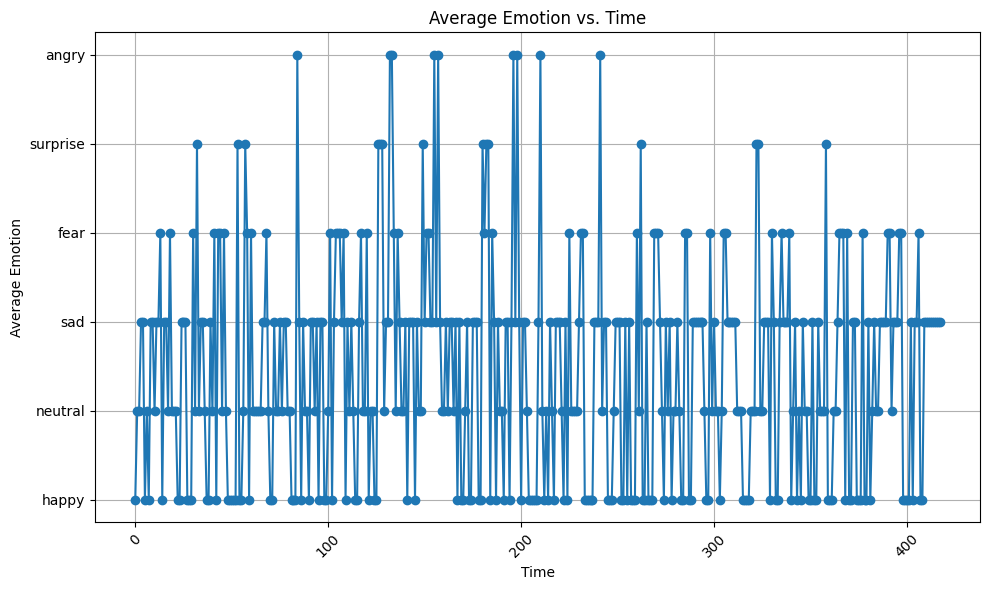

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate average emotion
def calculate_average_emotion(row):
    face_emotion = row['face_emotion']
    voice_emotion = row['voice emotion']

    # If both face and voice emotions are NaN, return NaN
    if face_emotion == "not available" and voice_emotion == "not available":
        return "not available"

    # If face emotion is NaN or voice emotion is NaN, use the other value
    elif face_emotion == "not available":
        return voice_emotion

    elif voice_emotion == "not available":
        return face_emotion

    # If both face and voice emotions are available, use only face emotion
    else:
        return face_emotion

merged_df_filled.reset_index(inplace=True)
# Apply the function to calculate average emotion for each row
merged_df_filled['average_emotion'] = merged_df_filled.apply(calculate_average_emotion, axis=1)

# Plot emotion vs. time graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['average_emotion'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Emotion')
plt.title('Average Emotion vs. Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
df = merged_df_filled

df

,time,face_emotion,voice emotion,average_emotion
0,2024-04-24 21:16:21,happy,not available,happy
1,2024-04-24 21:16:22,neutral,not available,neutral
2,2024-04-24 21:16:23,neutral,not available,neutral
3,2024-04-24 21:16:23,sad,not available,sad
4,2024-04-24 21:16:25,sad,not available,sad
...,...,...,...,...
413,2024-04-24 21:27:09,not available,sad,sad
414,2024-04-24 21:27:18,not available,sad,sad
415,2024-04-24 21:27:26,not available,sad,sad
416,2024-04-24 21:27:35,not available,sad,sad


In [83]:
import pandas as pd
from statistics import mode

# Calculate mode of the average_emotion column
mode_emotion = mode(df['average_emotion'])

print("Mode emotion:", mode_emotion)


Mode emotion: sad


In [86]:
print(type(mode_emotion))

<class 'str'>


In [84]:
import pandas as pd
from collections import Counter

# Calculate mode of the average_emotion column
mode_emotions = Counter(df['average_emotion']).most_common(7)

print("Top 7 emotions based on mode:")
for emotion, count in mode_emotions:
    print(emotion, ":", count)


Top 7 emotions based on mode:
sad : 133
happy : 122
neutral : 92
fear : 48
surprise : 14
angry : 9
